In [158]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt

In [159]:
raw_poly_data = np.loadtxt("poly_data.csv", delimiter=" ")
print(str("Shape of Data: {}").format(raw_poly_data.shape))

Shape of Data: (200, 2)


In [160]:
number_of_splits = 5
polynomial_degree_array = np.arange(1, 41, 1)
mse_error_array = []

In [161]:
for poly_degree in polynomial_degree_array:
    polynomial_features = PolynomialFeatures(degree=poly_degree)
    transformed_poly_data = polynomial_features.fit_transform(raw_poly_data[:, 0].reshape(-1, 1))
    linear_regression_obj = LinearRegression()

    _ = linear_regression_obj.fit(transformed_poly_data, raw_poly_data[:, 1])

    if (poly_degree % 5 == 0):
        print(str("Polynomial Degree: {:2d}; Training Accuracy: {:3.1f}%").format(poly_degree,
                                                                                  linear_regression_obj.score(
                                                                                      transformed_poly_data,
                                                                                      raw_poly_data[:, 1]) * 100))

    cross_validation_obj = KFold(n_splits=number_of_splits)
    computed_cross_val_scores = -1 * cross_val_score(linear_regression_obj, transformed_poly_data, raw_poly_data[:, 1],
                                                     scoring='neg_mean_squared_error', cv=cross_validation_obj)

    mse_error_array.append(computed_cross_val_scores)

Polynomial Degree:  5; Training Accuracy: 94.7%
Polynomial Degree: 10; Training Accuracy: 94.8%
Polynomial Degree: 15; Training Accuracy: 94.9%
Polynomial Degree: 20; Training Accuracy: 95.0%
Polynomial Degree: 25; Training Accuracy: 95.1%
Polynomial Degree: 30; Training Accuracy: 76.4%
Polynomial Degree: 35; Training Accuracy: 60.0%
Polynomial Degree: 40; Training Accuracy: 54.9%


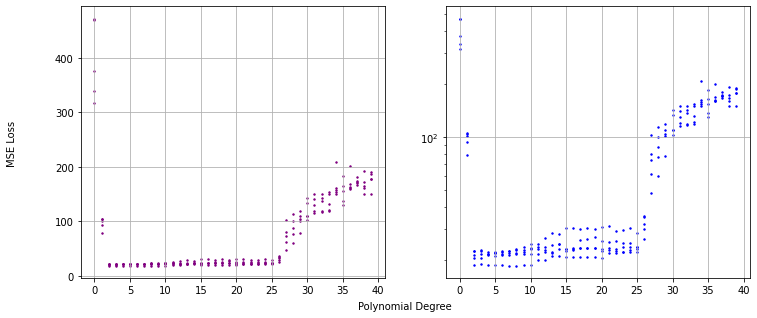

In [171]:
plt.rcParams['figure.figsize'] = (12, 5)
fig, axs = plt.subplots(1, 2, sharex=True)

mse_error_array = np.array(mse_error_array)
for poly_degree in range(polynomial_degree_array[-1]):
    for split in range(number_of_splits):
        axs[0].scatter(poly_degree, mse_error_array[poly_degree][split], c="Purple", s=2)
        axs[0].set_yscale('linear')

for poly_degree in range(polynomial_degree_array[-1]):
    for split in range(number_of_splits):
        axs[1].scatter(poly_degree, mse_error_array[poly_degree][split], c="Blue", s=2)
        axs[1].set_yscale('log')

axs[0].grid()
axs[1].grid()
fig.text(0.5, 0.04, 'Polynomial Degree', ha='center')
fig.text(0.04, 0.5, 'MSE Loss', va='center', rotation='vertical')

plt.show()

### Which Polynomial Degree fits the data the best?

Based on median MSE error computed above for each polynomial degree.

In [163]:
median_mse_error_array = np.median(mse_error_array, axis=1)
min_mse = min(median_mse_error_array)
lowest_error_polynomial_degree = median_mse_error_array.tolist().index(min_mse) + 1
print(str("Best Fitting Polynomial Degree is: {}").format(lowest_error_polynomial_degree))

Best Fitting Polynomial Degree is: 3


### Regression using Degree 3 Polynomial

In [164]:
polynomial_features = PolynomialFeatures(degree=3)
transformed_poly_data = polynomial_features.fit_transform(raw_poly_data[:, 0].reshape(-1, 1))
linear_regression_obj = LinearRegression()
_ = linear_regression_obj.fit(transformed_poly_data, raw_poly_data[:, 1])

print(str("Polynomial Degree: {:2d}; Training Accuracy: {:3.1f}%").format(3,
                                                                          linear_regression_obj.score(
                                                                              transformed_poly_data,
                                                                              raw_poly_data[:, 1]) * 100))

Polynomial Degree:  3; Training Accuracy: 94.7%


In [264]:
beta_array = linear_regression_obj.coef_
X_array = np.arange(raw_poly_data[:, 0].min(), raw_poly_data[:, 0].max(), 0.1)
evaluated_polynomial_function = linear_regression_obj.intercept_ + beta_array[0] + X_array * beta_array[
    1] + X_array ** 2 * beta_array[2] + X_array ** 3 * beta_array[3]

print(r'Fitted Polynomial Function: {:.1f} + (X * {:.1f}) + (X^2 * {:.1f}) + (X^3 * {:.1f})'.format(
    linear_regression_obj.intercept_, beta_array[1], beta_array[2], beta_array[3]))

Fitted Polynomial Function: 19.8 + (X * -19.0) + (X^2 * -0.1) + (X^3 * 2.2)


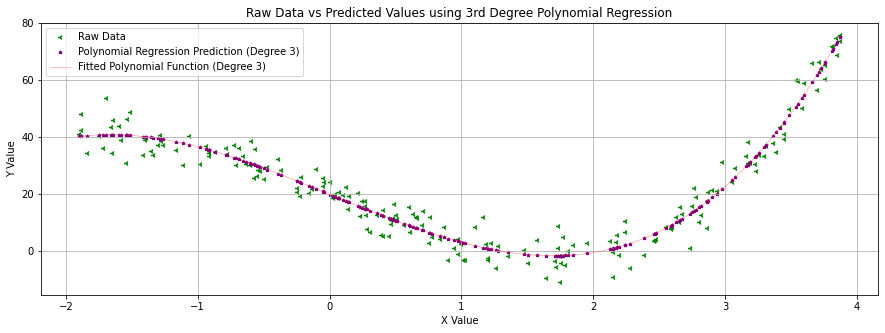

In [225]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.scatter(raw_poly_data[:, 0], raw_poly_data[:, 1], c="Green", s=26, marker="3", label="Raw Data")
plt.scatter(raw_poly_data[:, 0], linear_regression_obj.predict(transformed_poly_data), color="Purple", s=10, marker="*",
            label="Polynomial Regression Prediction (Degree 3)")
plt.plot(X_array, evaluated_polynomial_function, color="Red", linewidth=0.5, alpha=0.5,
         label="Fitted Polynomial Function (Degree 3)")
plt.title("Raw Data vs Predicted Values using 3rd Degree Polynomial Regression")
plt.ylabel("Y Value")
plt.xlabel("X Value")
plt.legend()
plt.grid()
plt.show()